<a href="https://colab.research.google.com/github/PabloCGarcia/bioDeepLearning/blob/main/Clase01_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

red_wine = pd.read_csv('/content/drive/MyDrive/winequality-red.csv')
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(units=512, activation='relu', input_shape=[11]),
    layers.Dense(units=512, activation='relu'),
    layers.Dense(units=512, activation='relu'),
    layers.Dense(units=1),
])


In [24]:
model.compile(
    optimizer='adam',
    loss='mae',
)

In [25]:
from sklearn.model_selection import train_test_split
X = red_wine.copy()
Y = X.pop('quality')
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.33)

In [26]:
history = model.fit(
    X_train, Y_train,
    validation_data=(X_valid, Y_valid),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
5/5 [==============================] - 1s 69ms/step - loss: 0.8806 - val_loss: 0.5452
Epoch 2/10
5/5 [==============================] - 0s 33ms/step - loss: 0.7260 - val_loss: 0.6393
Epoch 3/10
5/5 [==============================] - 0s 31ms/step - loss: 0.7174 - val_loss: 0.5127
Epoch 4/10
5/5 [==============================] - 0s 30ms/step - loss: 0.5810 - val_loss: 0.5183
Epoch 5/10
5/5 [==============================] - 0s 32ms/step - loss: 0.5597 - val_loss: 0.5333
Epoch 6/10
5/5 [==============================] - 0s 30ms/step - loss: 0.5366 - val_loss: 0.5376
Epoch 7/10
5/5 [==============================] - 0s 32ms/step - loss: 0.5194 - val_loss: 0.5723
Epoch 8/10
5/5 [==============================] - 0s 34ms/step - loss: 0.5329 - val_loss: 0.5067
Epoch 9/10
5/5 [==============================] - 0s 33ms/step - loss: 0.4918 - val_loss: 0.4743
Epoch 10/10
5/5 [==============================] - 0s 32ms/step - loss: 0.4841 - val_loss: 0.5258


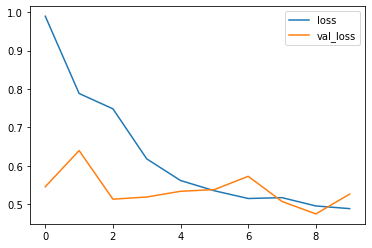

In [27]:
history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot();